In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
from kneed import KneeLocator

import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('disCleaned.csv')
df.head()

,disappearance,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Austria,874.731279,1012.663974,926.026869,719.572364,995.823775,772.066135,612.470646,846.815657,907.886818,885.715848,902.854329,1117.345643,1269.019458,1249.0,0.0,0.0,0.0,0.0,0.0
1,Belgium,1133.360563,884.233268,1484.300964,1579.418571,1396.235438,1158.037756,1537.413085,1103.118346,649.930516,934.292881,870.665179,934.468749,914.636559,1245.0,0.0,0.0,0.0,0.0,0.0
2,Bulgaria,275.084816,350.399596,340.568697,397.314698,364.190796,430.013986,420.382519,364.189968,444.717889,409.275903,395.357991,359.519751,375.941251,419.0,0.0,0.0,0.0,0.0,0.0
3,Croatia,327.123995,336.767996,354.862995,375.427996,370.009547,373.753059,386.132852,386.334464,377.142185,365.637529,369.838593,367.153143,360.364120,387.0,0.0,0.0,0.0,0.0,0.0
4,Cyprus,66.796997,52.891097,51.378797,53.095997,59.812396,69.647505,55.495666,69.284049,77.293095,75.437867,73.905648,80.793525,85.398320,89.0,0.0,0.0,0.0,0.0,0.0


In [3]:
#picking year 2013 because the data are missing for most country from 2014 onwards

X = df.iloc[:34,[1,14]]
print(X)

            2000     2013
0     874.731279   1249.0
1    1133.360563   1245.0
2     275.084816    419.0
3     327.123995    387.0
4      66.796997     89.0
5     560.226396    637.0
6     790.643989    822.0
7      97.338603    120.0
8     967.218994   1095.0
9    5402.080678   5707.0
10   8769.880653   9378.0
11    687.435658   1101.0
12    632.937172    177.0
13     83.158199    196.0
14   5149.236346   5634.0
15    161.794837     95.0
16    173.243675    197.0
17    144.159996    241.0
18      8.810502     22.0
19   1859.771680   1625.0
20   2045.587692   1669.0
21    646.394092    840.0
22    551.025995    891.0
23    263.315742    328.0
24    172.664142    184.0
25   2991.363838   3234.0
26   1173.089486   1175.0
27   2342.282593   2828.0
28   6625.659910   7435.0
29    657.200694    763.0
30   1863.096808   3648.0
31    826.930028   1123.0
32    191.742555    429.0
33  18745.563718  23417.0


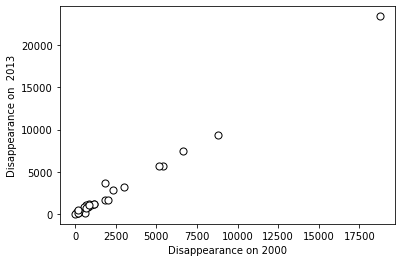

In [4]:
x_= df.iloc[:34,1]
y_= df.iloc[:34,14]
plt.scatter(
   x_, y_,
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.xlabel("Disappearance on 2000")
plt.ylabel("Disappearance on  2013")
plt.show()

In [5]:
kmeans = KMeans(n_clusters=2, random_state=0) 

label = kmeans.fit(X)
labels = label.labels_
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


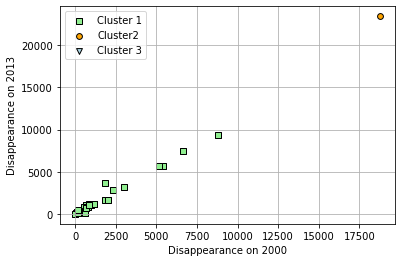

In [6]:
plt.scatter(
    X.iloc[y_kmeans == 0, 0], X.iloc[y_kmeans == 0, 1],
    s=34, c='lightgreen',
    marker='s', edgecolor='black',
    label='Cluster 1'
)

plt.scatter(
    X.iloc[y_kmeans == 1, 0], X.iloc[y_kmeans == 1, 1],
    s=34, c='orange',
    marker='o', edgecolor='black',
    label='Cluster2'
)

plt.scatter(
    X.iloc[y_kmeans == 2, 0], X.iloc[y_kmeans == 2, 1],
    s=34, c='lightblue',
    marker='v', edgecolor='black',
    label='Cluster 3'
)


plt.legend(scatterpoints=1)
plt.grid()
plt.xlabel("Disappearance on 2000")
plt.ylabel("Disappearance on 2013")
plt.show()

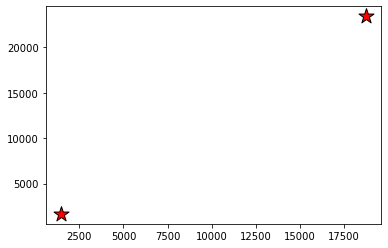

In [7]:
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

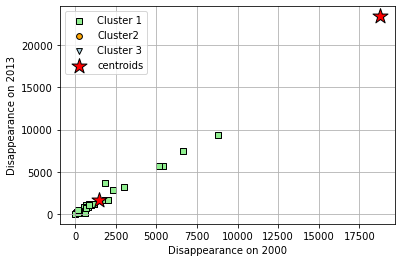

In [8]:
#combine

plt.scatter(
    X.iloc[y_kmeans == 0, 0], X.iloc[y_kmeans == 0, 1],
    s=34, c='lightgreen',
    marker='s', edgecolor='black',
    label='Cluster 1'
)

plt.scatter(
    X.iloc[y_kmeans == 1, 0], X.iloc[y_kmeans == 1, 1],
    s=34, c='orange',
    marker='o', edgecolor='black',
    label='Cluster2'
)

plt.scatter(
    X.iloc[y_kmeans == 2, 0], X.iloc[y_kmeans == 2, 1],
    s=34, c='lightblue',
    marker='v', edgecolor='black',
    label='Cluster 3'
)

plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)


plt.legend(scatterpoints=1)
plt.grid()
plt.xlabel("Disappearance on 2000")
plt.ylabel("Disappearance on 2013")
plt.show()

In [9]:
distortions = []
for i in range(1, 35):
    kmeans = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)
    print(i, distortions)


1 [1053298008.1102934]
2 [1053298008.1102934, 304451458.0907381]
3 [1053298008.1102934, 304451458.0907381, 58531301.27757579]
4 [1053298008.1102934, 304451458.0907381, 58531301.27757579, 29001019.993354958]
5 [1053298008.1102934, 304451458.0907381, 58531301.27757579, 29001019.993354958, 15648698.568920119]
6 [1053298008.1102934, 304451458.0907381, 58531301.27757579, 29001019.993354958, 15648698.568920119, 9899740.919238245]
7 [1053298008.1102934, 304451458.0907381, 58531301.27757579, 29001019.993354958, 15648698.568920119, 9899740.919238245, 7050695.285163904]
8 [1053298008.1102934, 304451458.0907381, 58531301.27757579, 29001019.993354958, 15648698.568920119, 9899740.919238245, 7050695.285163904, 5996840.082841263]
9 [1053298008.1102934, 304451458.0907381, 58531301.27757579, 29001019.993354958, 15648698.568920119, 9899740.919238245, 7050695.285163904, 5996840.082841263, 5967652.716621135]
10 [1053298008.1102934, 304451458.0907381, 58531301.27757579, 29001019.993354958, 15648698.5689201

In [10]:
kl = KneeLocator(range(1, 35), distortions, curve="convex", direction="decreasing")
kl.elbow

3

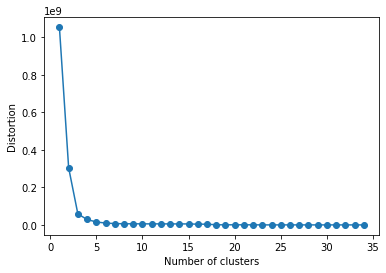

In [11]:
plt.plot(range(1, 35), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [13]:
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score

print("Davies Bouldin Score:", davies_bouldin_score(X, labels))
print("Calinski Harabasz Score:", calinski_harabasz_score(X, labels))
print("Silhouette Score:", silhouette_score(X, labels))

Davies Bouldin Score: 0.07803877309220124
Calinski Harabasz Score: 78.70906498823159
Silhouette Score: 0.8586619588202701
